# Optimizing a Mutual Fund Portfolio using NSE Stocks

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11

### Load and preview the dataset
The dataset contains daily stock data for companies listed on the Nairobi Securities Exchange from January to October 2024.
This section loads the data, checks its structure, and performs an initial inspection to confirm that the columns and data types are correctly formatted.

In [3]:
# Load dataset
df = pd.read_csv("NSE_data_all_stocks_2024_jan_to_oct.csv")

# Display the first few records
df.head()


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2-Jan-24,EGAD,Eaagads Ltd,10.35,14.5,12.8,12.8,12.8,13.95,-1.15,8.24%,100,-
1,2-Jan-24,KUKZ,Kakuzi Plc,342,440,385,385,385,385,-,-,-,-
2,2-Jan-24,KAPC,Kapchorua Tea Kenya Plc,207,280,215,215,215,215,-,-,-,-
3,2-Jan-24,LIMT,Limuru Tea Plc,365,380,380,380,380,380,-,-,-,-
4,2-Jan-24,SASN,Sasini Plc,15.1,22,20,20,20,20,-,-,"3,300.00",-


In [4]:
# Shape and basic information
print(f"Dataset shape: {df.shape}")
df.info()


Dataset shape: (15258, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15258 entries, 0 to 15257
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            15258 non-null  object
 1   Code            15258 non-null  object
 2   Name            15258 non-null  object
 3   12m Low         15258 non-null  object
 4   12m High        15258 non-null  object
 5   Day Low         15258 non-null  object
 6   Day High        15258 non-null  object
 7   Day Price       15258 non-null  object
 8   Previous        15258 non-null  object
 9   Change          15258 non-null  object
 10  Change%         15258 non-null  object
 11  Volume          15258 non-null  object
 12  Adjusted Price  15258 non-null  object
dtypes: object(13)
memory usage: 1.5+ MB


In [5]:
# Check for missing values and duplicated rows
df.isna().sum()
df.duplicated().sum()


0

### Data Cleaning and formatting 
The dataset contains several numeric columns stored as text and placeholders like '-' instead of null values.
This section cleans the data by replacing invalid symbols, converting data types, and sorting the dataset for consistency.

In [6]:
# Replace placeholder dashes with NaN
df.replace('-', np.nan, inplace=True)

# Convert numeric columns to proper floats
num_cols = ['12m Low', '12m High', 'Day Low', 'Day High',
            'Day Price', 'Previous', 'Change', 'Volume']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')

# Drop rows without valid Day Price
df.dropna(subset=['Day Price'], inplace=True)

# Sort by stock code and date
df.sort_values(['Code', 'Date'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Confirm data types and new structure
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13812 entries, 0 to 13811
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            13812 non-null  datetime64[ns]
 1   Code            13812 non-null  object        
 2   Name            13812 non-null  object        
 3   12m Low         13812 non-null  float64       
 4   12m High        13650 non-null  float64       
 5   Day Low         13812 non-null  float64       
 6   Day High        13812 non-null  float64       
 7   Day Price       13812 non-null  float64       
 8   Previous        13806 non-null  float64       
 9   Change          8225 non-null   float64       
 10  Change%         8219 non-null   object        
 11  Volume          1898 non-null   float64       
 12  Adjusted Price  0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 1.4+ MB


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2024-01-02,ABSA,ABSA Bank Kenya Plc,10.55,16.7,11.45,11.75,11.55,11.45,0.1,0.87%,NaN,NaN
1,2024-01-03,ABSA,ABSA Bank Kenya Plc,10.55,16.7,11.40,11.70,11.45,11.55,-0.1,0.87%,NaN,NaN
2,2024-01-04,ABSA,ABSA Bank Kenya Plc,10.55,16.7,11.40,11.65,11.55,11.45,0.1,0.87%,NaN,NaN
3,2024-01-05,ABSA,ABSA Bank Kenya Plc,10.55,16.7,11.55,11.75,11.65,11.55,0.1,0.87%,NaN,NaN
4,2024-01-08,ABSA,ABSA Bank Kenya Plc,10.55,16.7,11.55,11.75,11.65,11.55,0.1,0.87%,NaN,NaN


Some columns such as Adjusted Price, Change, and Change% contain significant missing data or duplicate information.

These are dropped to retain only relevant features for calculating ROI and volatility.Some columns such as Adjusted Price, Change, and Change% contain significant missing data or duplicate information.
These are dropped to retain only relevant features for calculating ROI and volatility.

In [7]:
# Drop unnecessary columns
df.drop(columns=['Adjusted Price', 'Change', 'Change%'], inplace=True)

# Final check for null values
df.isna().sum()


Date             0
Code             0
Name             0
12m Low          0
12m High       162
Day Low          0
Day High         0
Day Price        0
Previous         6
Volume       11914
dtype: int64

## Descriptive Analysis and Context Check


Before evaluating performance metrics like ROI and volatility,
it’s important to understand the basic structure of the dataset and gain a quick overview of the stock market coverage.
This section provides a brief look at the number of unique stocks, the time period covered,
and the overall distribution of stock prices across the dataset.

In [8]:
# Number of unique stocks
unique_stocks = df['Code'].nunique()
date_range = (df['Date'].min(), df['Date'].max())

print(f"Number of unique stocks: {unique_stocks}")
print(f"Date range: {date_range[0].strftime('%d %b %Y')} to {date_range[1].strftime('%d %b %Y')}")


Number of unique stocks: 68
Date range: 02 Jan 2024 to 31 Oct 2024


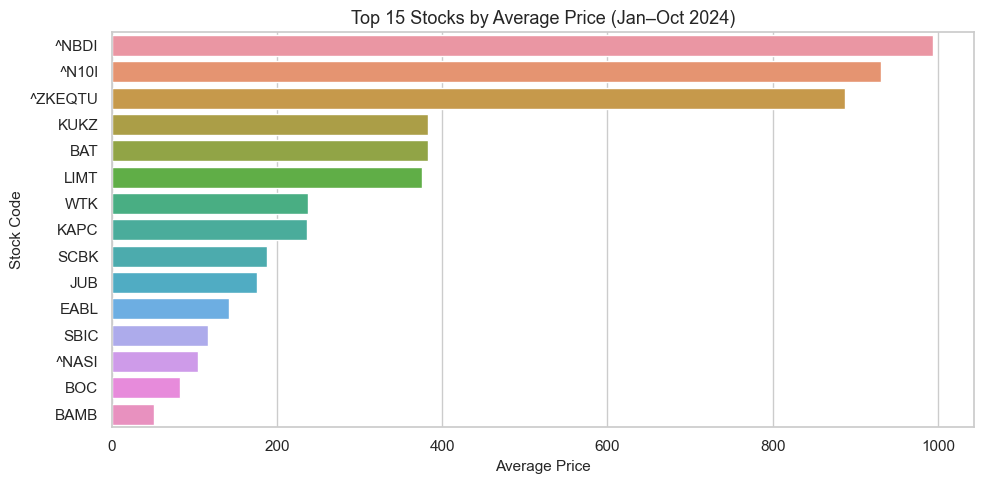

In [9]:
# Average price per stock (to show price diversity)
avg_prices = df.groupby('Code')['Day Price'].mean().sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=avg_prices.values, y=avg_prices.index, ax=ax)
ax.set_title('Top 15 Stocks by Average Price (Jan–Oct 2024)')
ax.set_xlabel('Average Price')
ax.set_ylabel('Stock Code')
plt.tight_layout()
plt.show()


The chart highlights that a few NSE stocks trade at consistently higher price levels, reflecting
differences in company size, valuation, and market activity.
This preliminary view sets the stage for deeper performance analysis through ROI and volatility,
which focus on growth potential rather than absolute price levels.


The descriptive overview indicates the diversity of stock prices within the dataset and confirms that the data spans multiple companies and months, providing a suitable foundation for performance evaluation through ROI and volatility analysis.


## Calculating ROI and Volatility


This section evaluates the performance of each NSE stock by calculating its Return on Investment (ROI) and Volatility.

- ROI measures the overall percentage change in a stock’s price between January and October 2024.

- Volatility, represented by the standard deviation of daily returns, indicates the risk or price fluctuation level of each stock.

These metrics help identify stocks that deliver high returns while maintaining low volatility, which are ideal characteristics for a mutual fund portfolio

In [10]:
# Calculate daily returns per stock
df['Daily_Return'] = df.groupby('Code')['Day Price'].pct_change()

# Calculate ROI for each stock (first to last day)
roi_df = df.groupby('Code').agg(
    Start_Price=('Day Price', 'first'),
    End_Price=('Day Price', 'last')
).reset_index()

roi_df['ROI_%'] = ((roi_df['End_Price'] - roi_df['Start_Price']) / roi_df['Start_Price']) * 100

# Calculate volatility (standard deviation of daily returns)
volatility_df = df.groupby('Code')['Daily_Return'].std().reset_index(name='Volatility')

# Merge ROI and Volatility data
metrics_df = pd.merge(roi_df, volatility_df, on='Code')

# Add stock names for clarity
stock_names = df[['Code', 'Name']].drop_duplicates()
metrics_df = pd.merge(metrics_df, stock_names, on='Code')

# Reorder columns for readability
metrics_df = metrics_df[['Code', 'Name', 'Start_Price', 'End_Price', 'ROI_%', 'Volatility']]

metrics_df.head(10)


,Code,Name,Start_Price,End_Price,ROI_%,Volatility
0,ABSA,ABSA Bank Kenya Plc,11.55,15.30,32.467532,0.014058
1,ARM,ARM Cement Plc,5.55,5.55,0.000000,0.000000
2,BAMB,Bamburi Cement Ltd,36.00,65.75,82.638889,0.034648
3,BAT,British American Tobacco Kenya Plc,425.00,356.75,-16.058824,0.011550
4,BKG,BK Group Plc,35.50,33.10,-6.760563,0.034717
5,BOC,BOC Kenya Plc,82.00,80.00,-2.439024,0.028397
6,BRIT,Britam Holdings Plc,5.14,5.54,7.782101,0.031567
7,CABL,East African Cables Plc,0.98,1.05,7.142857,0.036284
8,CARB,Carbacid Investments Plc,15.00,21.70,44.666667,0.022110
9,CGEN,Car and General (K) Ltd,25.00,23.00,-8.000000,0.038235


The ROI and volatility summary reveals distinct performance patterns across NSE stocks.
Companies such as Bamburi Cement (BAMB) and Carbacid Investments (CARB) delivered strong positive returns,
while ABSA Bank Kenya showed steady growth with notably low volatility indicating stability and consistent performance.
In contrast, firms like British American Tobacco (BAT) and BK Group (BKG) experienced negative returns despite relatively low price fluctuations,
suggesting limited short-term growth potential.

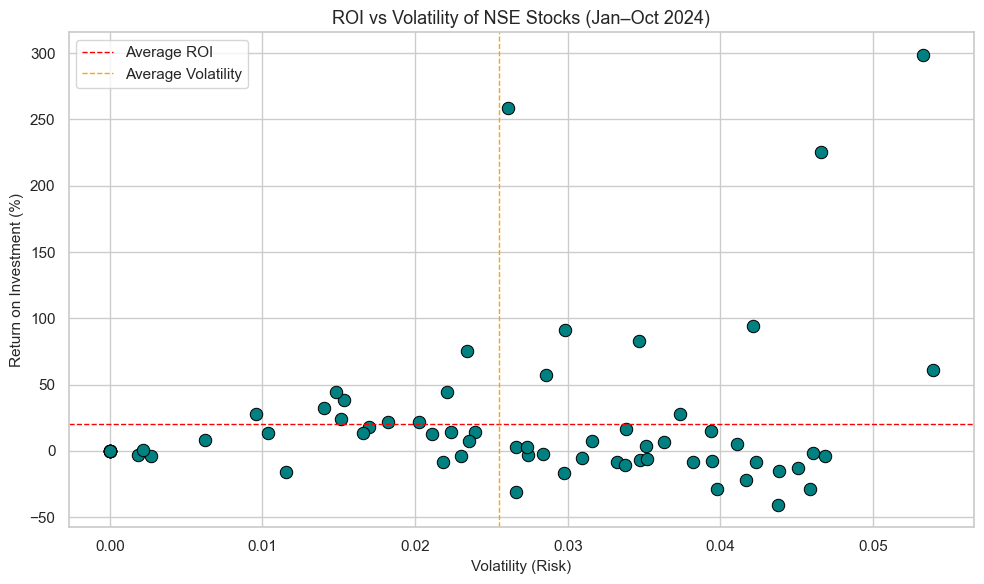

In [11]:
# ROI vs Volatility scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=metrics_df, x='Volatility', y='ROI_%', ax=ax, s=80, color='teal', edgecolor='black')

# Highlight mean lines
ax.axhline(metrics_df['ROI_%'].mean(), color='red', linestyle='--', linewidth=1, label='Average ROI')
ax.axvline(metrics_df['Volatility'].mean(), color='orange', linestyle='--', linewidth=1, label='Average Volatility')

# Titles and labels
ax.set_title('ROI vs Volatility of NSE Stocks (Jan–Oct 2024)')
ax.set_xlabel('Volatility (Risk)')
ax.set_ylabel('Return on Investment (%)')
ax.legend()

plt.tight_layout()
plt.show()


The relationship between ROI and Volatility helps assess the balance between risk and return.
In this scatter plot, each point represents a stock listed on the Nairobi Securities Exchange.

Stocks positioned toward the top-left (high ROI, low volatility) are ideal for long-term investment.

Stocks on the bottom-right (low ROI, high volatility) carry greater risk with limited reward potential.

### Selecting Top-Performing Stocks

To build a balanced mutual fund portfolio, the analysis selects stocks with above-average ROI and below-average volatility.
These represent investments that have performed well while maintaining relatively low risk.
The selection focuses on identifying a small group of stocks suitable for long-term, stable growth.

In [12]:
# Calculate the average ROI and Volatility across all stocks
avg_roi = metrics_df['ROI_%'].mean()
avg_vol = metrics_df['Volatility'].mean()

# Select stocks with above-average ROI and below-average Volatility
selected_stocks = metrics_df[
    (metrics_df['ROI_%'] > avg_roi) & 
    (metrics_df['Volatility'] < avg_vol)
].sort_values(by='ROI_%', ascending=False)

# Display the top recommended stocks
selected_stocks.reset_index(drop=True, inplace=True)
selected_stocks.head(10)


,Code,Name,Start_Price,End_Price,ROI_%,Volatility
0,KCB,KCB Group Plc,21.95,38.50,75.398633,0.023384
1,SCBK,Standard Chartered Bank Kenya Ltd,160.25,232.00,44.773791,0.014807
2,CARB,Carbacid Investments Plc,15.00,21.70,44.666667,0.022110
3,EQTY,Equity Group Holdings Plc,34.20,47.30,38.304094,0.015334
4,ABSA,ABSA Bank Kenya Plc,11.55,15.30,32.467532,0.014058
5,^NASI,NSE All-Share Index,91.97,117.61,27.878656,0.009610
6,COOP,Co-operative Bank of Kenya Ltd,11.35,14.10,24.229075,0.015115
7,SCOM,Safaricom Plc,13.75,16.75,21.818182,0.018228
8,SBIC,Stanbic Holdings Plc,106.00,129.00,21.698113,0.020285


The selected stocks represent the most attractive options for inclusion in a mutual fund portfolio.
Each company demonstrates above-average returns while maintaining lower-than-average volatility,
indicating a strong balance between risk and reward.

This group reflects stocks with consistent growth and relatively stable price behavior
key characteristics for investors seeking sustainable long-term performance.